Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE

In [130]:
from sklearn.datasets import load_boston

In [131]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [132]:
X = pd.DataFrame(data=load_boston().data, columns = load_boston().feature_names)

In [133]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [134]:
y = pd.DataFrame(data=load_boston().target, columns=['price'])

In [135]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
print(f'X_test, X_test, y_train, y_test: {X_test.shape, X_test.shape, y_train.shape, y_test.shape}')

X_test, X_test, y_train, y_test: ((102, 13), (102, 13), (404, 1), (102, 1))


In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()

In [140]:
X_train_scaled = pd.DataFrame(data=scaler.fit_transform(X_train), columns=load_boston().feature_names)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=load_boston().feature_names)

In [141]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [142]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.842585e-16,5.056461e-17,3.074548e-15,-5.056461e-17,-5.221483e-15,-4.031016e-15,-1.001124e-15,-3.176777e-16,-3.654942e-17,-1.534457e-16,2.005876e-14,5.754473e-15,-1.853578e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,3.645893e-01,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227e+00,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


In [143]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [144]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [145]:
pd.DataFrame(X_train_tsne).head()

,0,1
0,17.645624,28.406218
1,1.613379,-11.563689
2,-14.598500,-16.157717
3,27.653980,24.220755
4,3.873900,-9.404490


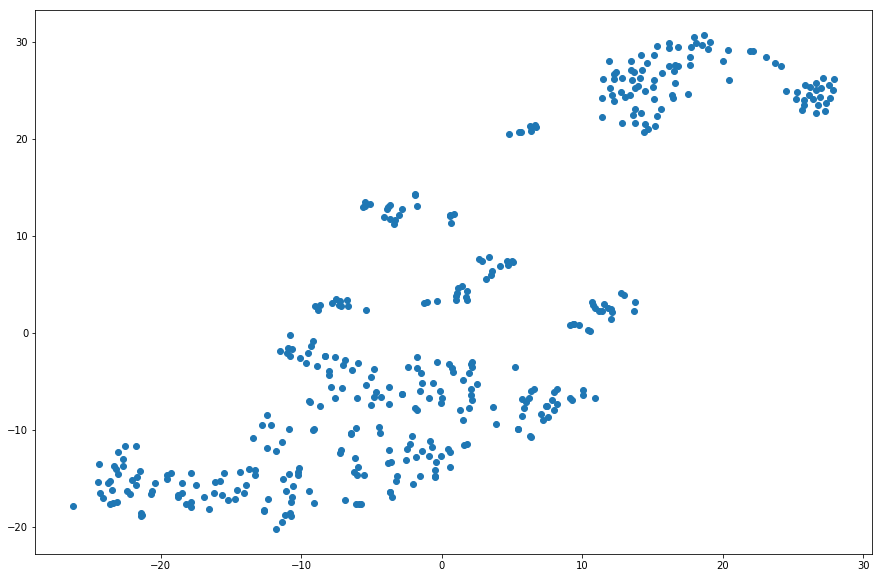

In [146]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [147]:
from sklearn.cluster import KMeans

In [148]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [149]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [150]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(25, 20, 'cluster_2')

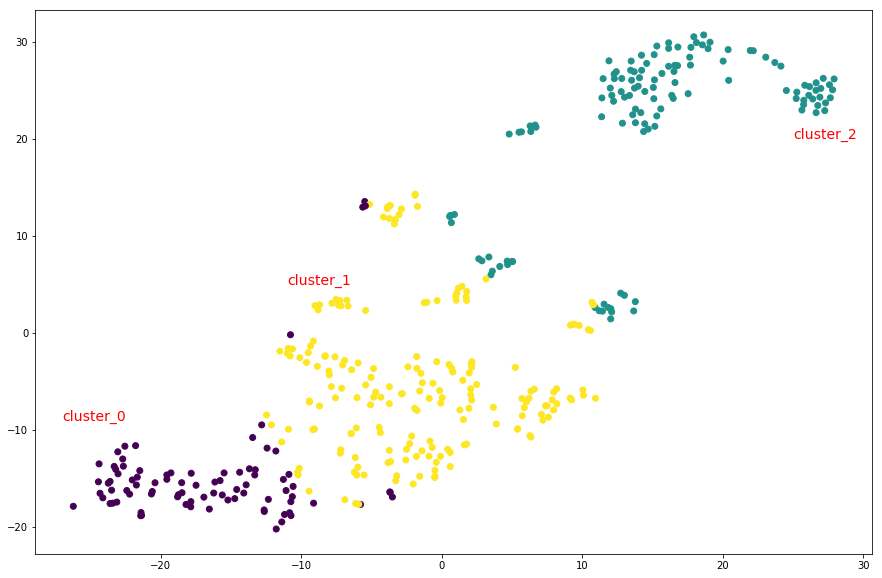

In [151]:
plt.rcParams['figure.figsize']=(15, 10)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.text(-27,-9,'cluster_0', fontsize=14, color='red')
plt.text(-11,5,'cluster_1', fontsize=14, color='red')
plt.text(25,20,'cluster_2', fontsize=14, color='red')

In [152]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [162]:
for i in range(len(np.unique(labels_train))):
    print(f"for cluster #{i}:\n CRIM_mean equals: {X_train['CRIM'][labels_train==i].mean()},\n{y_train[labels_train==i].mean()}\n")

for cluster #0:
 CRIM_mean equals: 0.07356558139534886,
price    27.788372
dtype: float64

for cluster #1:
 CRIM_mean equals: 10.797028425196853,
price    16.165354
dtype: float64

for cluster #2:
 CRIM_mean equals: 0.42166020942408367,
price    24.958115
dtype: float64



### я не нашел пока способа, как избавиться от dtype: float64 в выводе выше, если подскажите, буду признателен

In [ ]:
* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [163]:
labels_test = kmeans.predict(X_test_scaled)

In [165]:
for i in range(len(np.unique(labels_test))):
    print(f"for cluster #{i}:\n CRIM_mean equals: {X_test['CRIM'][labels_test==i].mean()},\n{y_test[labels_test==i].mean()}\n")

for cluster #0:
 CRIM_mean equals: 0.062060000000000004,
price    31.35
dtype: float64

for cluster #1:
 CRIM_mean equals: 10.165531142857143,
price    16.437143
dtype: float64

for cluster #2:
 CRIM_mean equals: 0.26607882352941176,
price    21.860784
dtype: float64

